<a href="https://www.mbd.rwth-aachen.de/">
    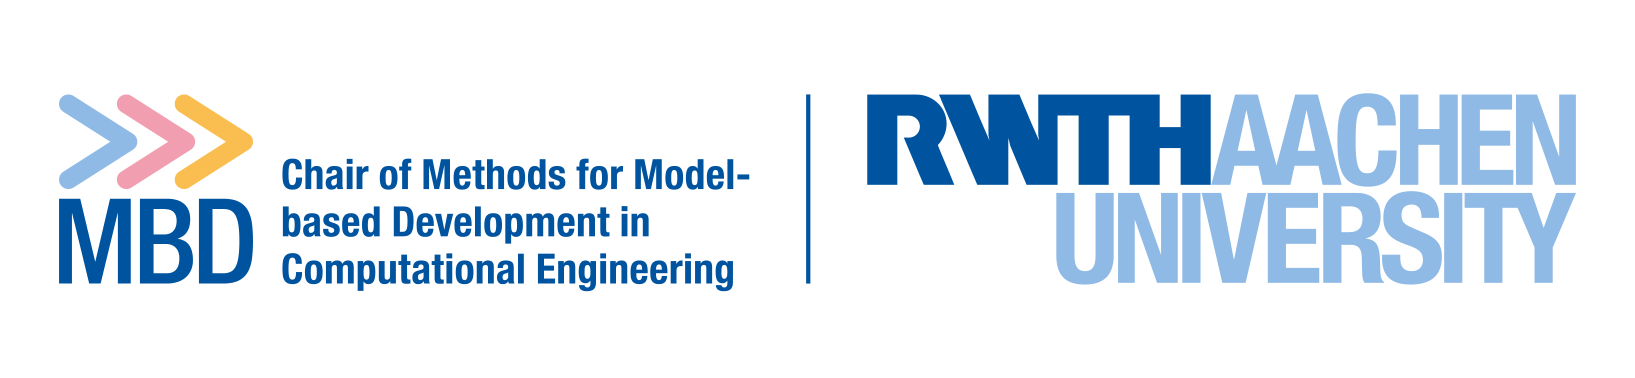
</a>
<a href="https://www.cpbl.rwth-aachen.de/">
    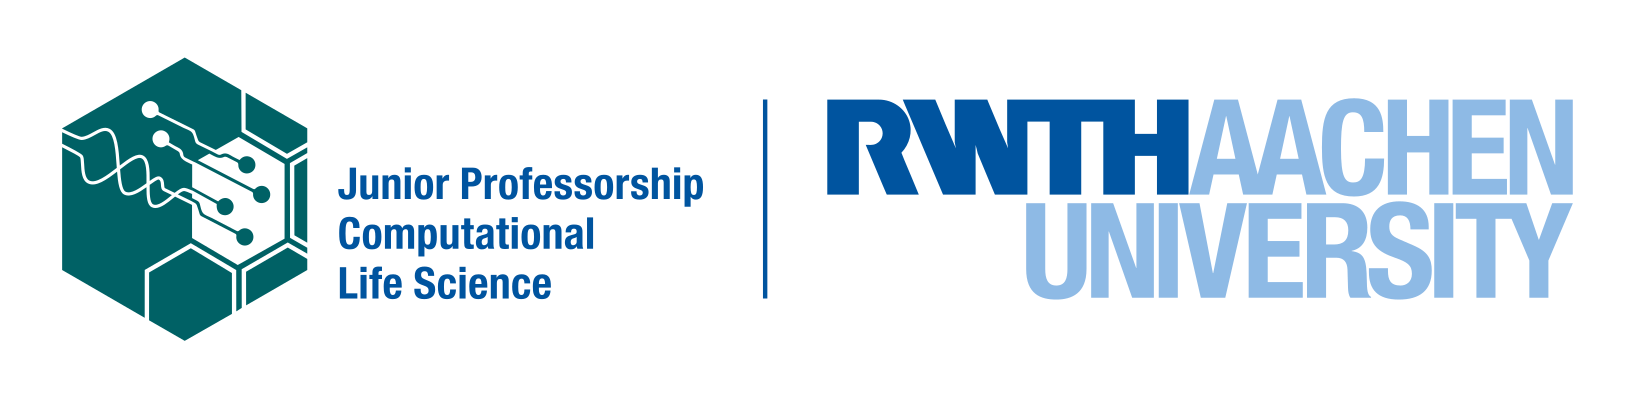
</a>

# Societal Challenges Datathon

Name: **Yajesh Chandra**

Student number (Matrikelnummer): **FILL-ME**

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

csv_dir = 'data/CSV'

## Explore [dabieties](data/CSV/dabieties.csv)

total records: 11744

diabetes:
has_diabetes
No            10371
Yes            1081
Borderline      284
Name: count, dtype: int64

avg age diagnosed: 48.9 years
No of age diagnosed records: 1057

prediabetes:
has_prediabetes
No     7089
Yes     918
Name: count, dtype: int64

BloodSugarTest_Last3Years
No     4667
Yes    3370
Name: count, dtype: int64

takes_insulin
No     737
Yes    344
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


,sequence_no,EverTold_Diabetes,Age_DiabetesDiagnosis,EverTold_Prediabetes,BloodSugarTest_Last3Years,CurrentlyTaking_Insulin,InsulinDuration,Unnamed: 7,CurrentlyTaking_DiabeticPills,has_diabetes,has_prediabetes,takes_insulin
0,130378.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,No,No,NaN
1,130379.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,No,No,NaN
2,130380.0,1.0,35.0,NaN,NaN,2.0,NaN,NaN,1.0,Yes,NaN,No
3,130381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN


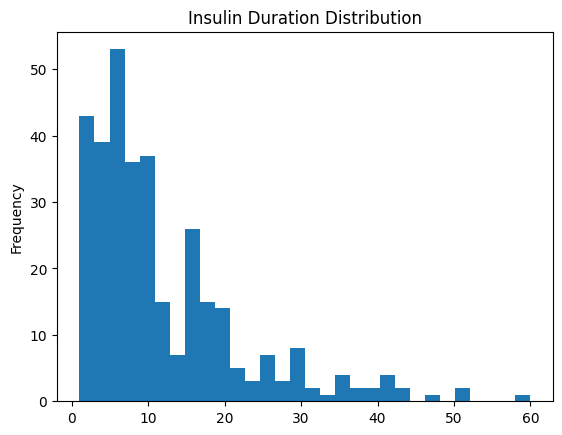

In [8]:
df = pd.read_csv(f'{csv_dir}/diabetes.csv')

# decode the values - 1=Yes, 2=No, 7=Refused, 9=Don't know
df['has_diabetes'] = df['EverTold_Diabetes'].map({1: 'Yes', 2: 'No', 3: 'Borderline', 7: np.nan, 9: np.nan})
df['has_prediabetes'] = df['EverTold_Prediabetes'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
df['takes_insulin'] = df['CurrentlyTaking_Insulin'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})

print(f"total records: {len(df)}")
print(f"\ndiabetes:")
print(df['has_diabetes'].value_counts())

print(f"\navg age diagnosed: {df[df['Age_DiabetesDiagnosis'] <= 100]['Age_DiabetesDiagnosis'].mean():.1f} years")
print(f"No of age diagnosed records: {df[df['Age_DiabetesDiagnosis'] <= 100]['Age_DiabetesDiagnosis'].count()}")

print(f"\nprediabetes:")
print(df['has_prediabetes'].value_counts())

print()
print(df['BloodSugarTest_Last3Years'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan}).value_counts())

print()
print(df['takes_insulin'].value_counts())
    
print(df[df['InsulinDuration']<=100]['InsulinDuration'].plot(kind='hist', bins=30, title='Insulin Duration Distribution'))

df.head()


## Explore [BP/Chol](data/CSV/blood_pressure_cholesterol.csv)

In [9]:
bp = pd.read_csv(f'{csv_dir}/blood_pressure_cholesterol.csv')

bp['hypertension'] = bp['EverTold_Hypertension'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
bp['high_cholesterol'] = bp['EverTold_HighCholesterol'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
bp['on_bp_meds'] = bp['CurrentlyTaking_BloodPressureMedication'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})

print("hypertension:")
print(bp['hypertension'].value_counts())
print("\nhigh cholesterol:")
print(bp['high_cholesterol'].value_counts())
print("\npeople on bp meds:")
print(bp['on_bp_meds'].value_counts())

bp[['hypertension', 'high_cholesterol', 'on_bp_meds']].head(10)

hypertension:
hypertension
No     5518
Yes    2969
Name: count, dtype: int64

high cholesterol:
high_cholesterol
No     5348
Yes    3096
Name: count, dtype: int64

people on bp meds:
on_bp_meds
Yes    2442
No      523
Name: count, dtype: int64


,hypertension,high_cholesterol,on_bp_meds
0,Yes,No,Yes
1,Yes,No,Yes
2,No,Yes,NaN
3,No,No,NaN
4,No,No,NaN
5,No,No,NaN
6,Yes,Yes,Yes
7,Yes,No,No
8,Yes,Yes,Yes
9,No,No,NaN


## Relation Between above two files

In [10]:
combined = df.merge(bp, on='sequence_no', how='inner')
print(f"total ppl: {len(combined)}\n")

# 1=yes 2=no
combined['has_diabetes'] = combined['EverTold_Diabetes'].map({1: 'Yes', 2: 'No', 3: 'Borderline'})
combined['has_prediabetes'] = combined['EverTold_Prediabetes'].map({1: 'Yes', 2: 'No'})
combined['has_hypertension'] = combined['EverTold_Hypertension'].map({1: 'Yes', 2: 'No'})
combined['has_high_chol'] = combined['EverTold_HighCholesterol'].map({1: 'Yes', 2: 'No'})

diabetes_count = (combined['has_diabetes'] == 'Yes').sum()
prediabetes_count = (combined['has_prediabetes'] == 'Yes').sum()
bp_count = (combined['has_hypertension'] == 'Yes').sum()
chol_count = (combined['has_high_chol'] == 'Yes').sum()

print(f"diabetes: {diabetes_count}")
print(f"prediabetes: {prediabetes_count}")
print(f"high bp: {bp_count}")
print(f"high chol: {chol_count}\n")

has_all_three = ((combined['has_diabetes'] == 'Yes') & 
                 (combined['has_hypertension'] == 'Yes') & 
                 (combined['has_high_chol'] == 'Yes')).sum()

diabetes_and_bp = ((combined['has_diabetes'] == 'Yes') & 
                   (combined['has_hypertension'] == 'Yes')).sum()

diabetes_and_chol = ((combined['has_diabetes'] == 'Yes') & 
                     (combined['has_high_chol'] == 'Yes')).sum()

prediabetes_and_bp = ((combined['has_prediabetes'] == 'Yes') & 
                      (combined['has_hypertension'] == 'Yes')).sum()

prediabetes_and_chol = ((combined['has_prediabetes'] == 'Yes') & 
                        (combined['has_high_chol'] == 'Yes')).sum()

bp_and_chol = ((combined['has_hypertension'] == 'Yes') & 
               (combined['has_high_chol'] == 'Yes')).sum()

print("\n=== OVERLAP ===")
print(f"diabetes + bp + chol: {has_all_three}")
print(f"diabetes + bp: {diabetes_and_bp}")
print(f"diabetes + chol: {diabetes_and_chol}")
print(f"prediabetes + bp: {prediabetes_and_bp}")
print(f"prediabetes + chol: {prediabetes_and_chol}")
print(f"bp + chol: {bp_and_chol}\n")

if diabetes_count > 0:
    print(f"diabetes → {diabetes_and_bp/diabetes_count*100:.1f}% bp, {diabetes_and_chol/diabetes_count*100:.1f}% chol, {has_all_three/diabetes_count*100:.1f}% both")

if prediabetes_count > 0:
    print(f"prediabetes → {prediabetes_and_bp/prediabetes_count*100:.1f}% bp, {prediabetes_and_chol/prediabetes_count*100:.1f}% chol")

if bp_count > 0:
    print(f"bp → {diabetes_and_bp/bp_count*100:.1f}% diabetes, {prediabetes_and_bp/bp_count*100:.1f}% prediabetes, {bp_and_chol/bp_count*100:.1f}% chol")

if chol_count > 0:
    print(f"chol → {diabetes_and_chol/chol_count*100:.1f}% diabetes, {prediabetes_and_chol/chol_count*100:.1f}% prediabetes, {bp_and_chol/chol_count*100:.1f}% bp\n")

combined[['sequence_no', 'has_diabetes', 'has_prediabetes', 'has_hypertension', 'has_high_chol']].head(20)

total ppl: 8501

diabetes: 1075
prediabetes: 895
high bp: 2969
high chol: 3096


=== OVERLAP ===
diabetes + bp + chol: 580
diabetes + bp: 773
diabetes + chol: 754
prediabetes + bp: 439
prediabetes + chol: 516
bp + chol: 1780

diabetes → 71.9% bp, 70.1% chol, 54.0% both
prediabetes → 49.1% bp, 57.7% chol
bp → 26.0% diabetes, 14.8% prediabetes, 60.0% chol
chol → 24.4% diabetes, 16.7% prediabetes, 57.5% bp


diabetes: 1075
prediabetes: 895
high bp: 2969
high chol: 3096


=== OVERLAP ===
diabetes + bp + chol: 580
diabetes + bp: 773
diabetes + chol: 754
prediabetes + bp: 439
prediabetes + chol: 516
bp + chol: 1780

diabetes → 71.9% bp, 70.1% chol, 54.0% both
prediabetes → 49.1% bp, 57.7% chol
bp → 26.0% diabetes, 14.8% prediabetes, 60.0% chol
chol → 24.4% diabetes, 16.7% prediabetes, 57.5% bp



,sequence_no,has_diabetes,has_prediabetes,has_hypertension,has_high_chol
0,130378.0,No,No,Yes,No
1,130379.0,No,No,Yes,No
2,130380.0,Yes,NaN,No,Yes
3,130384.0,No,No,No,No
4,130385.0,No,Yes,No,No
5,130386.0,No,No,No,No
6,130387.0,No,No,Yes,Yes
7,130388.0,No,No,Yes,No
8,130389.0,No,Yes,Yes,Yes
9,130390.0,No,No,No,No


#### Correlation Matrix

Correlation Matrix:
                  Diabetes  Prediabetes  Hypertension  High_Cholesterol
Diabetes          1.000000    -0.130515      0.295146          0.266618
Prediabetes      -0.130515     1.000000      0.101635          0.151372
Hypertension      0.295146     0.101635      1.000000          0.358281
High_Cholesterol  0.266618     0.151372      0.358281          1.000000


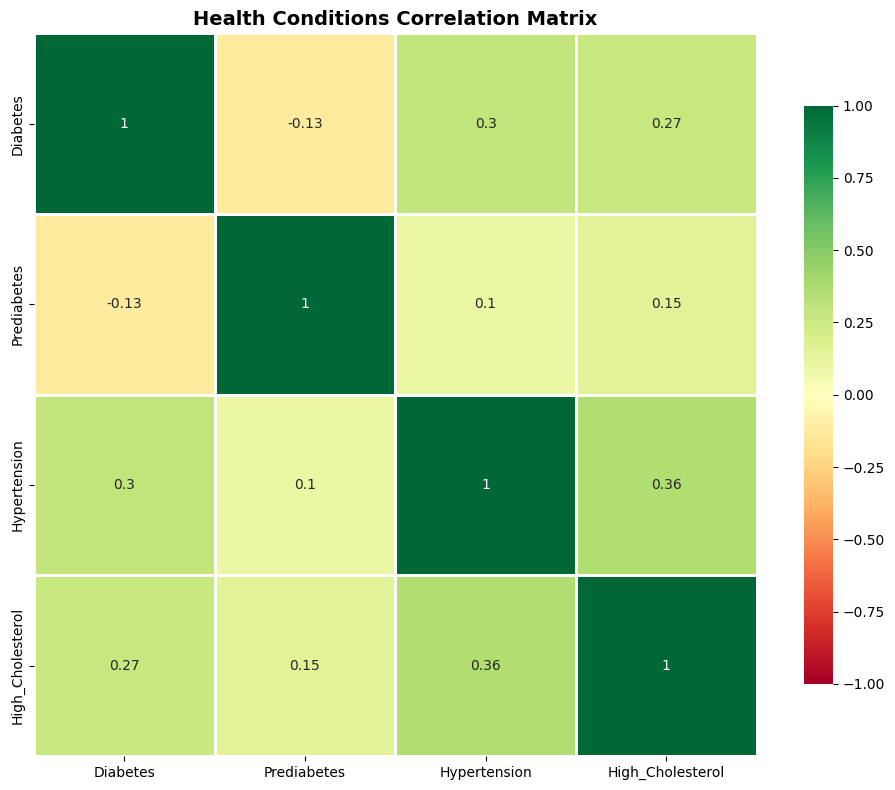


=== INTERPRETATION ===
Diabetes <-> Prediabetes: -0.131 (very weak/no correlation)
Diabetes <-> Hypertension: 0.295 (weak positive correlation)
Diabetes <-> High_Cholesterol: 0.267 (weak positive correlation)
Prediabetes <-> Hypertension: 0.102 (weak positive correlation)
Prediabetes <-> High_Cholesterol: 0.151 (weak positive correlation)
Hypertension <-> High_Cholesterol: 0.358 (moderate positive correlation)


In [11]:
# 1=Yes, 0=No
corr_data = combined.copy()
corr_data['Diabetes'] = (corr_data['EverTold_Diabetes'] == 1).astype(int)
corr_data['Prediabetes'] = (corr_data['EverTold_Prediabetes'] == 1).astype(int)
corr_data['Hypertension'] = (corr_data['EverTold_Hypertension'] == 1).astype(int)
corr_data['High_Cholesterol'] = (corr_data['EverTold_HighCholesterol'] == 1).astype(int)

health_data = corr_data[['Diabetes', 'Prediabetes', 'Hypertension', 'High_Cholesterol']]

correlation_matrix = health_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='RdYlGn',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Health Conditions Correlation Matrix', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n=== INTERPRETATION ===")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        print(f"{col1} <-> {col2}: {corr_value:.3f}", end="")
        if corr_value > 0.5:
            print(" (STRONG positive correlation)")
        elif corr_value > 0.3:
            print(" (moderate positive correlation)")
        elif corr_value > 0.1:
            print(" (weak positive correlation)")
        else:
            print(" (very weak/no correlation)")

## Explore [weight/height](data/CSV/weight_history.csv)

In [12]:
wt = pd.read_csv(f'{csv_dir}/weight_history.csv')

# replace weird values
wt = wt.replace({9999: np.nan, 5.397605346934028e-79: 0})

# calc BMI
wt['bmi'] = (wt['CurrentWeight'] * 0.453592) / ((wt['CurrentHeight'] * 0.0254) ** 2)

def get_bmi_category(bmi):
    if pd.isna(bmi):
        return np.nan
    elif bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

wt['bmi_cat'] = wt['bmi'].apply(get_bmi_category)

print(f"avg height: {wt['CurrentHeight'].mean():.1f} inches")
print(f"avg weight: {wt['CurrentWeight'].mean():.1f} lbs")
print(f"avg BMI: {wt['bmi'].mean():.1f}")
print("\nBMI categories:")
print(wt['bmi_cat'].value_counts())

wt[['CurrentHeight', 'CurrentWeight', 'bmi', 'bmi_cat']].head(10)

avg height: 68.2 inches
avg weight: 215.7 lbs
avg BMI: 34.4

BMI categories:
bmi_cat
Obese          2830
Overweight     2721
Normal         2608
Underweight     189
Name: count, dtype: int64


,CurrentHeight,CurrentWeight,bmi,bmi_cat
0,71.0,190.0,26.499328,Overweight
1,70.0,220.0,31.566364,Obese
2,60.0,150.0,29.294542,Overweight
3,68.0,204.0,31.017750,Obese
4,70.0,240.0,34.436033,Obese
5,68.0,200.0,30.409559,Obese
6,67.0,215.0,33.673387,Obese
7,66.0,270.0,43.578657,Obese
8,67.0,175.0,27.408571,Overweight
9,64.0,277.0,47.546415,Obese


## weight/height vs diabetes & prediabetes

if u got diabetes:

  Yes: 1043 ppl
    height: 66.2in, weight: 200.0lbs, BMI: 32.0

  No: 6997 ppl
    height: 66.5in, weight: 176.1lbs, BMI: 28.0

  Borderline: 266 ppl
    height: 65.9in, weight: 194.0lbs, BMI: 31.1


if u got prediabetes:

  Yes: 884 ppl
    height: 66.2in, weight: 193.5lbs, BMI: 31.0

  No: 6103 ppl
    height: 66.5in, weight: 173.6lbs, BMI: 27.5


correlations:
  BMI <-> diabetes: 0.186
  BMI <-> prediabetes: 0.121


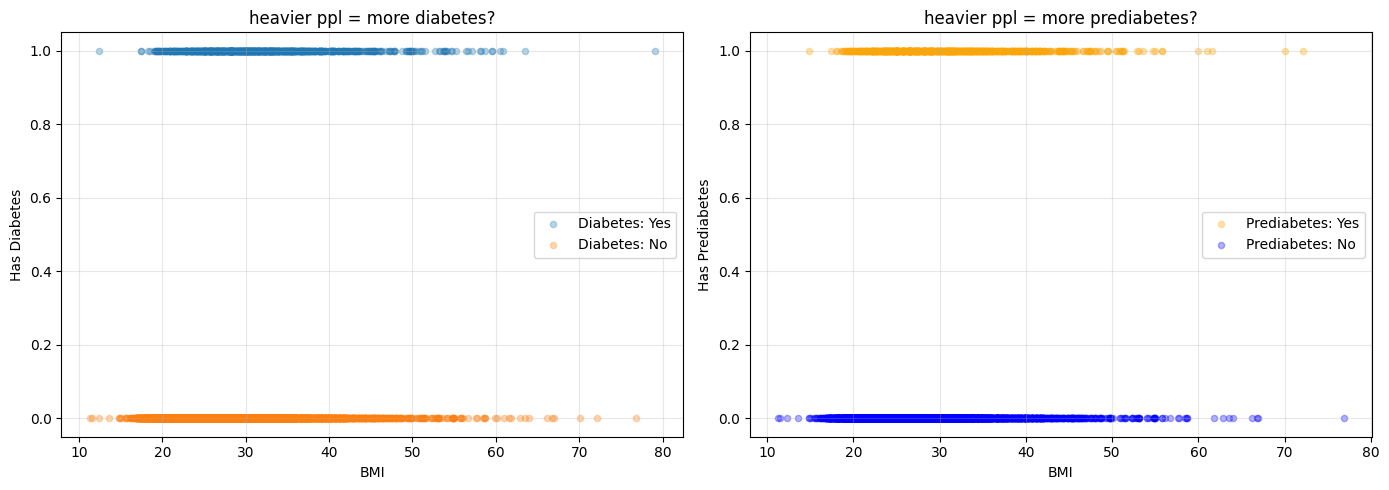

In [13]:
weight_diabetes = wt.merge(df[['sequence_no', 'EverTold_Diabetes', 'EverTold_Prediabetes']], 
                           on='sequence_no', how='inner')

weight_diabetes = weight_diabetes[(weight_diabetes['bmi'] <= 100) & (weight_diabetes['bmi'] >= 10)]

weight_diabetes['has_diabetes'] = weight_diabetes['EverTold_Diabetes'].map({1: 'Yes', 2: 'No', 3: 'Borderline'})
weight_diabetes['has_prediabetes'] = weight_diabetes['EverTold_Prediabetes'].map({1: 'Yes', 2: 'No'})

print("if u got diabetes:")
for status in ['Yes', 'No', 'Borderline']:
    subset = weight_diabetes[weight_diabetes['has_diabetes'] == status]
    if len(subset) > 0:
        print(f"\n  {status}: {len(subset)} ppl")
        print(f"    height: {subset['CurrentHeight'].mean():.1f}in, weight: {subset['CurrentWeight'].mean():.1f}lbs, BMI: {subset['bmi'].mean():.1f}")

print("\n\nif u got prediabetes:")
for status in ['Yes', 'No']:
    subset = weight_diabetes[weight_diabetes['has_prediabetes'] == status]
    if len(subset) > 0:
        print(f"\n  {status}: {len(subset)} ppl")
        print(f"    height: {subset['CurrentHeight'].mean():.1f}in, weight: {subset['CurrentWeight'].mean():.1f}lbs, BMI: {subset['bmi'].mean():.1f}")

# how much do BMI and these conditions go together
print("\n\ncorrelations:")
weight_diabetes['diabetes_binary'] = (weight_diabetes['EverTold_Diabetes'] == 1).astype(int)
weight_diabetes['prediabetes_binary'] = (weight_diabetes['EverTold_Prediabetes'] == 1).astype(int)

corr_bmi_diabetes = weight_diabetes['bmi'].corr(weight_diabetes['diabetes_binary'])
corr_bmi_prediabetes = weight_diabetes['bmi'].corr(weight_diabetes['prediabetes_binary'])

print(f"  BMI <-> diabetes: {corr_bmi_diabetes:.3f}")
print(f"  BMI <-> prediabetes: {corr_bmi_prediabetes:.3f}")

# pics
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BMI vs diabetes scatter
for status in ['Yes', 'No']:
    subset = weight_diabetes[weight_diabetes['has_diabetes'] == status]
    axes[0].scatter(subset['bmi'], [1 if status == 'Yes' else 0]*len(subset), 
                   alpha=0.3, label=f'Diabetes: {status}', s=20)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Has Diabetes')
axes[0].set_title('heavier ppl = more diabetes?')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# BMI vs prediabetes scatter
for status in ['Yes', 'No']:
    subset = weight_diabetes[weight_diabetes['has_prediabetes'] == status]
    axes[1].scatter(subset['bmi'], [1 if status == 'Yes' else 0]*len(subset), 
                   alpha=0.3, label=f'Prediabetes: {status}', s=20, color=['orange', 'blue'][0 if status == 'Yes' else 1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Has Prediabetes')
axes[1].set_title('heavier ppl = more prediabetes?')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Explore [Cigg Use](smoking_cigarette_use.csv)

In [14]:
smoke = pd.read_csv(f'{csv_dir}/smoking_cigarette_use.csv')

smoke['ever_smoked'] = smoke['SmokedAtLeast100CigarettesInLife'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
smoke['current_status'] = smoke['CurrentCigaretteSmoking'].map({1: 'Every day', 2: 'Some days', 3: 'Not at all', 7: np.nan, 9: np.nan})

print("ever smoked 100+ cigarettes:")
print(smoke['ever_smoked'].value_counts())
print("\ncurrent smoking:")
print(smoke['current_status'].value_counts())
print(f"\navg age started: {smoke['FirstCigaretteAge'][smoke['FirstCigaretteAge']<100].mean():.1f} years")

smoke[['ever_smoked', 'current_status', 'FirstCigaretteAge']].head(10)

ever smoked 100+ cigarettes:
ever_smoked
No     4878
Yes    3243
Name: count, dtype: int64

current smoking:
current_status
Not at all    2053
Every day      952
Some days      238
Name: count, dtype: int64

avg age started: 13.2 years


,ever_smoked,current_status,FirstCigaretteAge
0,Yes,Not at all,NaN
1,Yes,Not at all,NaN
2,No,NaN,NaN
3,No,NaN,NaN
4,No,NaN,NaN
5,Yes,Not at all,NaN
6,No,NaN,NaN
7,Yes,Every day,NaN
8,Yes,Not at all,NaN
9,No,NaN,NaN


## Relation btw Cigg and Diabetes


smoking vs diabetes:

  Yes: 1076 ppl
    ever smoked: {'Yes': 541, 'No': 529}
    current status: {'Not at all': 370, 'Every day': 136, 'Some days': 35}
    avg age started: nan years

  No: 7655 ppl
    ever smoked: {'No': 4215, 'Yes': 2562}
    current status: {'Not at all': 1582, 'Every day': 786, 'Some days': 194}
    avg age started: 13.2 years

  Borderline: 279 ppl
    ever smoked: {'Yes': 139, 'No': 133}
    current status: {'Not at all': 101, 'Every day': 29, 'Some days': 9}
    avg age started: nan years

correlations:
  SmokedAtLeast100CigarettesInLife <-> diabetes: -0.077
  CurrentCigaretteSmoking <-> diabetes: 0.046
  SmokedAtLeast100CigarettesInLife <-> prediabetes: -0.009
  CurrentCigaretteSmoking <-> prediabetes: 0.059


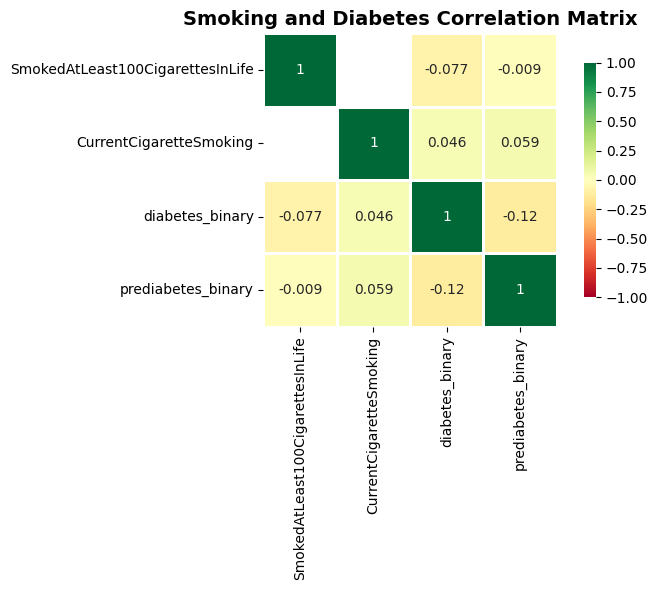

In [15]:
smoke_diabetes = smoke.merge(df[['sequence_no', 'EverTold_Diabetes', 'EverTold_Prediabetes']], 
                           on='sequence_no', how='inner')
smoke_diabetes['has_diabetes'] = smoke_diabetes['EverTold_Diabetes'].map({1: 'Yes', 2: 'No', 3: 'Borderline'})
print("\nsmoking vs diabetes:")
for status in ['Yes', 'No', 'Borderline']:
    subset = smoke_diabetes[smoke_diabetes['has_diabetes'] == status]
    if len(subset) > 0:
        print(f"\n  {status}: {len(subset)} ppl")
        print(f"    ever smoked: {subset['ever_smoked'].value_counts().to_dict()}")
        print(f"    current status: {subset['current_status'].value_counts().to_dict()}")
        print(f"    avg age started: {subset['FirstCigaretteAge'][subset['FirstCigaretteAge']<100].mean():.1f} years")
        
        
# correlations

smoke_diabetes['diabetes_binary'] = (smoke_diabetes['EverTold_Diabetes'] == 1).astype(int)
smoke_diabetes['prediabetes_binary'] = (smoke_diabetes['EverTold_Prediabetes'] == 1).astype(int)
corr_smoke_diabetes = smoke_diabetes['SmokedAtLeast100CigarettesInLife'].corr(smoke_diabetes['diabetes_binary'])
corr_smoke_diabetes_2 = smoke_diabetes['CurrentCigaretteSmoking'].corr(smoke_diabetes['diabetes_binary'])
corr_smoke_prediabetes = smoke_diabetes['SmokedAtLeast100CigarettesInLife'].corr(smoke_diabetes['prediabetes_binary'])
corr_smoke_prediabetes_2 = smoke_diabetes['CurrentCigaretteSmoking'].corr(smoke_diabetes['prediabetes_binary'])
print(f"\ncorrelations:")
print(f"  SmokedAtLeast100CigarettesInLife <-> diabetes: {corr_smoke_diabetes:.3f}")
print(f"  CurrentCigaretteSmoking <-> diabetes: {corr_smoke_diabetes_2:.3f}")
print(f"  SmokedAtLeast100CigarettesInLife <-> prediabetes: {corr_smoke_prediabetes:.3f}")
print(f"  CurrentCigaretteSmoking <-> prediabetes: {corr_smoke_prediabetes_2:.3f}")

#Heatmap
import matplotlib.pyplot as plt
corr_data = smoke_diabetes[['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking', 'diabetes_binary', 'prediabetes_binary']]
correlation_matrix = corr_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdYlGn',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Smoking and Diabetes Correlation Matrix',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Correlation of everything with each other

combined dataset size: 8431
columns: ['sequence_no', 'EverTold_Diabetes', 'EverTold_Prediabetes', 'CurrentWeight', 'CurrentHeight', 'bmi', 'SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking', 'EverTold_Hypertension', 'EverTold_HighCholesterol']

after cleaning: 8282 rows

correlation matrix:
                 Diabetes  Prediabetes    Weight    Height       BMI  \
Diabetes         1.000000    -0.131870  0.030591  0.016858  0.031742   
Prediabetes     -0.131870     1.000000  0.013715 -0.006079  0.016174   
Weight           0.030591     0.013715  1.000000  0.112786  0.982473   
Height           0.016858    -0.006079  0.112786  1.000000 -0.007241   
BMI              0.031742     0.016174  0.982473 -0.007241  1.000000   
EverSmoked       0.094248     0.020652  0.012330  0.006290  0.010126   
CurrentSmoker    0.014457    -0.021879 -0.014796 -0.004137 -0.015877   
Hypertension     0.289610     0.101417  0.032731  0.003837  0.035241   
HighCholesterol  0.261493     0.150459  0.000032 

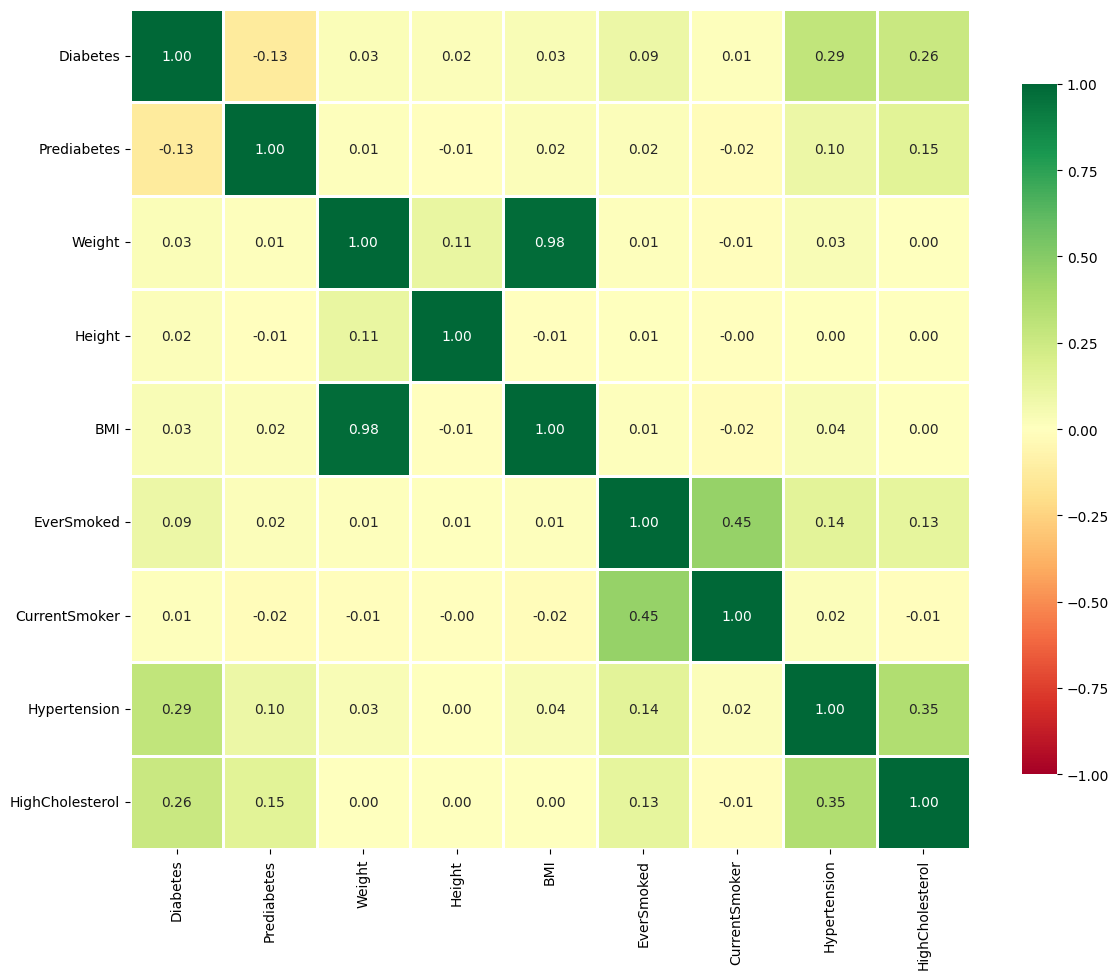

In [16]:

mega_df = df[['sequence_no', 'EverTold_Diabetes', 'EverTold_Prediabetes']].copy()

mega_df = mega_df.merge(wt[['sequence_no', 'CurrentWeight', 'CurrentHeight', 'bmi']], 
                        on='sequence_no', how='inner')

mega_df = mega_df.merge(smoke[['sequence_no', 'SmokedAtLeast100CigarettesInLife','CurrentCigaretteSmoking']], 
                        on='sequence_no', how='inner')

mega_df = mega_df.merge(bp[['sequence_no', 'EverTold_Hypertension', 'EverTold_HighCholesterol']], 
                        on='sequence_no', how='inner')

print(f"combined dataset size: {len(mega_df)}")
print(f"columns: {list(mega_df.columns)}\n")

correlation_cols = {
    'Diabetes': (mega_df['EverTold_Diabetes'] == 1).astype(int),
    'Prediabetes': (mega_df['EverTold_Prediabetes'] == 1).astype(int),
    'Weight': mega_df['CurrentWeight'],
    'Height': mega_df['CurrentHeight'],
    'BMI': mega_df['bmi'],
    'EverSmoked': (mega_df['SmokedAtLeast100CigarettesInLife'] == 1).astype(int),
    'CurrentSmoker': (mega_df['CurrentCigaretteSmoking'] == 1).astype(int),
    'Hypertension': (mega_df['EverTold_Hypertension'] == 1).astype(int),
    'HighCholesterol': (mega_df['EverTold_HighCholesterol'] == 1).astype(int),
}


#s

corr_df = pd.DataFrame(correlation_cols)

corr_df = corr_df.dropna()

print(f"after cleaning: {len(corr_df)} rows\n")

corr = corr_df.corr()

print("correlation matrix:")
print(corr)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0, 
            vmin=-1, vmax=1, square=True, linewidths=2,
            cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.tight_layout()
plt.show()

## Explore [Alcohol]()

In [17]:
alcohol = pd.read_csv(f'{csv_dir}/alcohol_use.csv')

# Map alcohol columns to readable categories
alcohol['ever_had_alcohol'] = alcohol['EverHad_Alcohol'].map({1: 'Yes', 2: 'No', 7: np.nan, 9: np.nan})
alcohol['alcohol_frequency'] = alcohol['AlcoholConsumptionFrequency_12Months'].map({
    1: 'Daily', 2: 'Weekly', 3: 'Monthly', 4: 'A few times', 5: 'Never', 7: np.nan, 9: np.nan
})
alcohol['heavy_drinking'] = alcohol['HeavyDrinkingWithinTwoHoursFrequency_12Months'].map({
    1: 'Daily', 2: 'Weekly', 3: 'Monthly', 4: 'A few times', 5: 'Never', 7: np.nan, 9: np.nan
})

print("ever had alcohol:")
print(alcohol['ever_had_alcohol'].value_counts())
print("\nalcohol consumption frequency (12 months):")
print(alcohol['alcohol_frequency'].value_counts())
print("\nheavy drinking frequency (12 months):")
print(alcohol['heavy_drinking'].value_counts())
print(f"\navg drinks per day (when drinking): {alcohol['AverageDrinksPerDrinkingDay_12Months'][alcohol['AverageDrinksPerDrinkingDay_12Months']<99].mean():.1f}")

alcohol[['ever_had_alcohol', 'alcohol_frequency', 'heavy_drinking', 'AverageDrinksPerDrinkingDay_12Months']].head(10)


ever had alcohol:
ever_had_alcohol
Yes    4918
No      558
Name: count, dtype: int64

alcohol consumption frequency (12 months):
alcohol_frequency
A few times    483
Monthly        458
Never          420
Weekly         301
Daily          163
Name: count, dtype: int64

heavy drinking frequency (12 months):
heavy_drinking
Never          99
A few times    71
Monthly        57
Weekly         34
Daily          12
Name: count, dtype: int64

avg drinks per day (when drinking): 2.6


,ever_had_alcohol,alcohol_frequency,heavy_drinking,AverageDrinksPerDrinkingDay_12Months
0,NaN,NaN,NaN,NaN
1,Yes,Weekly,NaN,3.0
2,Yes,NaN,NaN,1.0
3,Yes,A few times,NaN,2.0
4,Yes,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,Yes,Weekly,NaN,2.0
7,NaN,NaN,NaN,NaN
8,No,NaN,NaN,NaN
9,Yes,NaN,NaN,1.0


## Relation btw Alcohol and Diabetes


alcohol use vs diabetes:

  Yes: 870 ppl
    ever had alcohol: {'Yes': 623, 'No': 100}
    consumption frequency: {'A few times': 48, 'Never': 37, 'Monthly': 26, 'Weekly': 20, 'Daily': 13}
    heavy drinking frequency: {'Never': 13, 'A few times': 7, 'Monthly': 4, 'Weekly': 3, 'Daily': 3}
    avg drinks per day: 2.6

  No: 5243 ppl
    ever had alcohol: {'Yes': 4129, 'No': 444}
    consumption frequency: {'A few times': 427, 'Monthly': 416, 'Never': 378, 'Weekly': 271, 'Daily': 144}
    heavy drinking frequency: {'Never': 83, 'A few times': 63, 'Monthly': 50, 'Weekly': 30, 'Daily': 9}
    avg drinks per day: 2.6

  Borderline: 223 ppl
    ever had alcohol: {'Yes': 165, 'No': 14}
    consumption frequency: {'Monthly': 16, 'Weekly': 10, 'A few times': 8, 'Daily': 6, 'Never': 5}
    heavy drinking frequency: {'Monthly': 3, 'Never': 3, 'Weekly': 1, 'A few times': 1}
    avg drinks per day: 2.9

correlations with diabetes:
  EverHad_Alcohol <-> diabetes: 0.052
  AlcoholConsumptionFrequency

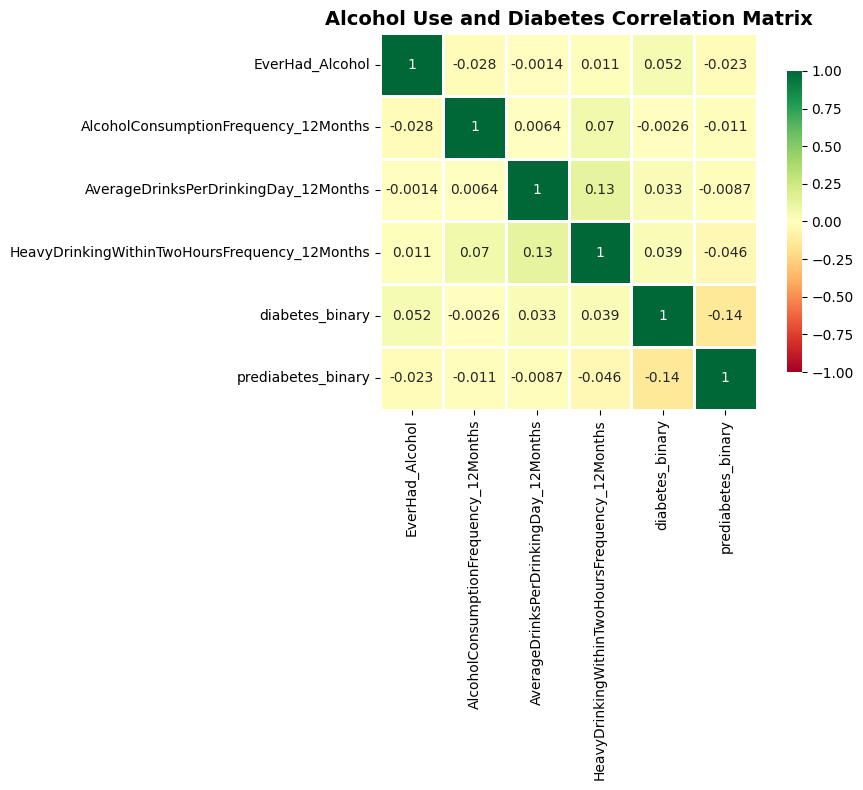

In [18]:
alcohol_diabetes = alcohol.merge(df[['sequence_no', 'EverTold_Diabetes', 'EverTold_Prediabetes']], 
                           on='sequence_no', how='inner')
alcohol_diabetes['has_diabetes'] = alcohol_diabetes['EverTold_Diabetes'].map({1: 'Yes', 2: 'No', 3: 'Borderline'})
print("\nalcohol use vs diabetes:")
for status in ['Yes', 'No', 'Borderline']:
    subset = alcohol_diabetes[alcohol_diabetes['has_diabetes'] == status]
    if len(subset) > 0:
        print(f"\n  {status}: {len(subset)} ppl")
        print(f"    ever had alcohol: {subset['ever_had_alcohol'].value_counts().to_dict()}")
        print(f"    consumption frequency: {subset['alcohol_frequency'].value_counts().to_dict()}")
        print(f"    heavy drinking frequency: {subset['heavy_drinking'].value_counts().to_dict()}")
        print(f"    avg drinks per day: {subset['AverageDrinksPerDrinkingDay_12Months'][subset['AverageDrinksPerDrinkingDay_12Months']<99].mean():.1f}")

# correlations
alcohol_diabetes['diabetes_binary'] = (alcohol_diabetes['EverTold_Diabetes'] == 1).astype(int)
alcohol_diabetes['prediabetes_binary'] = (alcohol_diabetes['EverTold_Prediabetes'] == 1).astype(int)
corr_alcohol_diabetes = alcohol_diabetes['EverHad_Alcohol'].corr(alcohol_diabetes['diabetes_binary'])
corr_alcohol_diabetes_2 = alcohol_diabetes['AlcoholConsumptionFrequency_12Months'].corr(alcohol_diabetes['diabetes_binary'])
corr_alcohol_diabetes_3 = alcohol_diabetes['AverageDrinksPerDrinkingDay_12Months'].corr(alcohol_diabetes['diabetes_binary'])
corr_alcohol_prediabetes = alcohol_diabetes['EverHad_Alcohol'].corr(alcohol_diabetes['prediabetes_binary'])
corr_alcohol_prediabetes_2 = alcohol_diabetes['AlcoholConsumptionFrequency_12Months'].corr(alcohol_diabetes['prediabetes_binary'])
corr_alcohol_prediabetes_3 = alcohol_diabetes['AverageDrinksPerDrinkingDay_12Months'].corr(alcohol_diabetes['prediabetes_binary'])

print(f"\ncorrelations with diabetes:")
print(f"  EverHad_Alcohol <-> diabetes: {corr_alcohol_diabetes:.3f}")
print(f"  AlcoholConsumptionFrequency_12Months <-> diabetes: {corr_alcohol_diabetes_2:.3f}")
print(f"  AverageDrinksPerDrinkingDay_12Months <-> diabetes: {corr_alcohol_diabetes_3:.3f}")
print(f"\ncorrelations with prediabetes:")
print(f"  EverHad_Alcohol <-> prediabetes: {corr_alcohol_prediabetes:.3f}")
print(f"  AlcoholConsumptionFrequency_12Months <-> prediabetes: {corr_alcohol_prediabetes_2:.3f}")
print(f"  AverageDrinksPerDrinkingDay_12Months <-> prediabetes: {corr_alcohol_prediabetes_3:.3f}")

# Heatmap
import matplotlib.pyplot as plt
corr_data = alcohol_diabetes[['EverHad_Alcohol', 'AlcoholConsumptionFrequency_12Months', 'AverageDrinksPerDrinkingDay_12Months', 'HeavyDrinkingWithinTwoHoursFrequency_12Months', 'diabetes_binary', 'prediabetes_binary']]
correlation_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdYlGn',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Alcohol Use and Diabetes Correlation Matrix',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
